# lec01.basic_model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import  GlorotNormal

initializers
* ref : https://www.kaggle.com/code/sauravjoshi23/weight-initialization-methods-keras

<pre>
tf.keras.layers.<b>Dense</b>(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

In [3]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))  # 입력층
model.add(Dense(6, activation="relu"))               # 히든레이어
model.add(Dense(6, activation="relu"))               # 히든레이어
model.add(Dense(3, activation="softmax"))            # 출력층 3층
model.compile(loss="categorical_crossentropy",  optimizer="Adam",  metrics=["accuracy"])
# target이 int이면         loss="sparse categorical_crossentropy"
# target이 categorical(one-hot)이면 loss="categorical_crossentropy"


optimazer가 loss 평가
* loss="sparse categorical_crossentropy"  >> int
* loss="binary categorical_crossentropy"  >> 2종 분류
* loss="categorical_crossentropy"  >> 2종외의 분류

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [5]:
df = pd.read_csv("../ML/datasets/iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# y=df["target"]
# X=df.drop("target", axis=1)

# # yc = pd.get_dummies(y)
# # from keras.utils import to_categorical
# # yc2 = to_categorical(y,num_classes=3, dtype = "int")

# # print(yc[:5], yc2[:5])
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1, stratify=y)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

#loss="sparse categorical_crossentropy"

In [8]:
y=df["target"]
X=df.drop("target", axis=1)




# print(yc[:5], yc2[:5])

# loss="categorical_crossentropy"

In [9]:
yc = pd.get_dummies(y)
print(yc[:5])


from keras.utils import to_categorical
yc2 = to_categorical(y,num_classes=3, dtype = "int")

X_train, X_test, y_train, y_test = train_test_split(X,yc, test_size = 0.2, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# yc = pd.get_dummies(y)

   0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0


((120, 4), (30, 4), (120, 3), (30, 3))

In [10]:
fit_history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100) # 오차역전파 100번시행, 회귀계수 100번 조정
print(fit_history)
# pred = model.predict(X_test)


Epoch 1/100
4/4 [==============================] - 1s 70ms/step - loss: 1.1439 - accuracy: 0.3083 - val_loss: 1.1364 - val_accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1345 - accuracy: 0.3083 - val_loss: 1.1281 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1265 - accuracy: 0.3250 - val_loss: 1.1210 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1207 - accuracy: 0.3250 - val_loss: 1.1156 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1161 - accuracy: 0.3250 - val_loss: 1.1116 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.1131 - accuracy: 0.3250 - val_loss: 1.1081 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1105 - accuracy: 0.3250 - val_loss: 1.1054 - val_accuracy: 0.3333
Epoch 8/100
4/4 [===

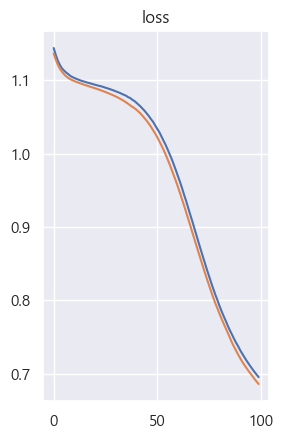

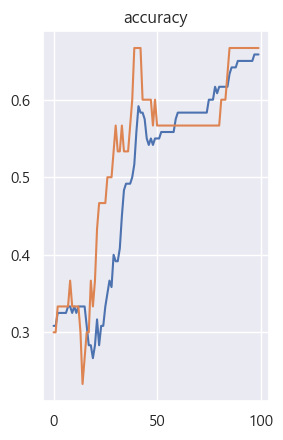

In [11]:

ax1 = plt.subplot(1,2,1)
ax1.set_title("loss")
plt.plot(fit_history.history["loss"])
plt.plot(fit_history.history["val_loss"])
plt.show()

ax2 = plt.subplot(1,2,2)
ax2.set_title("accuracy")
plt.plot(fit_history.history["accuracy"])
plt.plot(fit_history.history["val_accuracy"])
plt.show()

In [12]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.6859 - accuracy: 0.6667


[0.6858689785003662, 0.6666666865348816]

In [13]:
proba = model.predict(X_test)
print(f"proba : {proba[:5]}")

pred = np.argmax(proba, axis=1)
print(f"pred : {pred[:5]}")  #------------submit에 제출할 예측답안


#----------------------- 이런코딩 없다.. 그냥 해보자-----------------
y_test22 = np.argmax(y_test.values, axis=1)
print(f"y_test : {y_test22[:5]}")

from sklearn.metrics import f1_score, confusion_matrix
print( confusion_matrix(y_test22, pred) )

1/1 [==============================] - 0s 90ms/step
proba : [[0.24770278 0.40709773 0.34519947]
 [0.85975784 0.04018625 0.10005594]
 [0.29494032 0.3724093  0.3326503 ]
 [0.9207098  0.01877887 0.06051132]
 [0.92376983 0.01781532 0.05841479]]
pred : [1 0 1 0 0]
y_test : [2 0 1 0 0]
[[10  0  0]
 [ 0 10  0]
 [ 0 10  0]]
